In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df=df.drop(columns='_c39')

In [8]:
#Separating the numerical and categorical variables to get better visualisation.

col=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        col.append(i)


col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [9]:
for i in col:
    print(df[i].value_counts())

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [10]:
# Let us change the ? to Nan values first so that we can impute.
df = df.replace('?',np.NaN)

In [11]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Now we have values changed to nan, now we can go ahead to impute the data using simple imputer.

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['collision_type'] = imp.fit_transform(df['collision_type'].values.reshape(-1, 1))

In [14]:
#Using fillna to impute the na values to No.

df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now, NaN's are treated, let's delete unnecessary columns to make sure that the data is clean.

In [15]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model', 'incident_hour_of_the_day'], axis = 1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


# Visualization

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


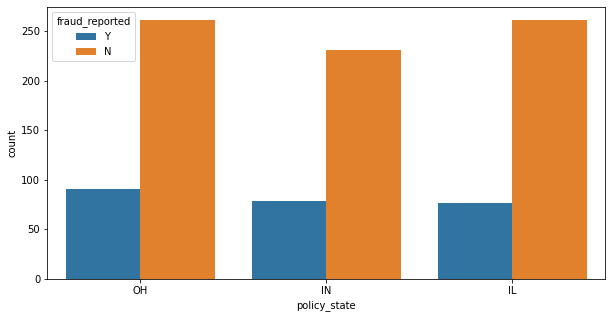

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


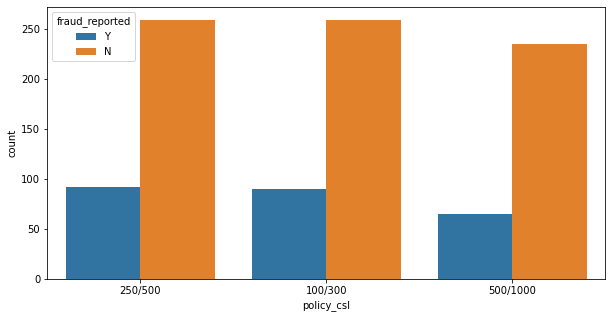

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


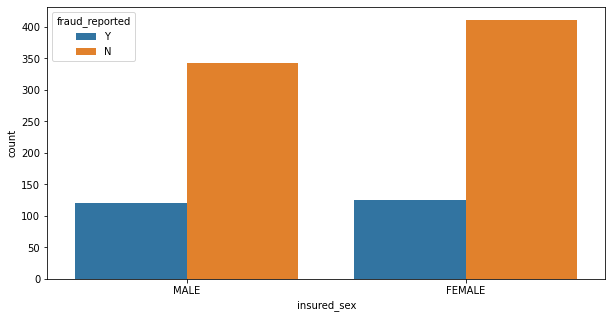

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


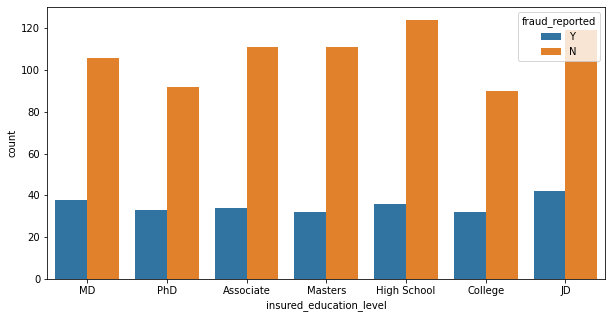

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


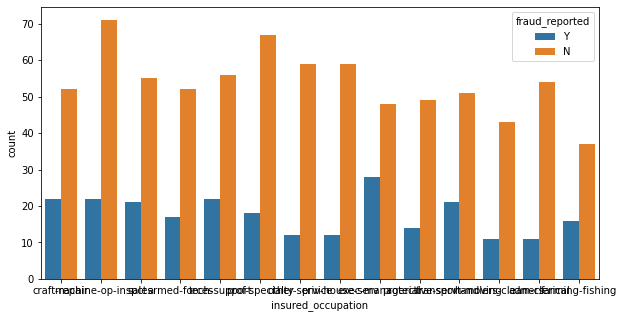

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


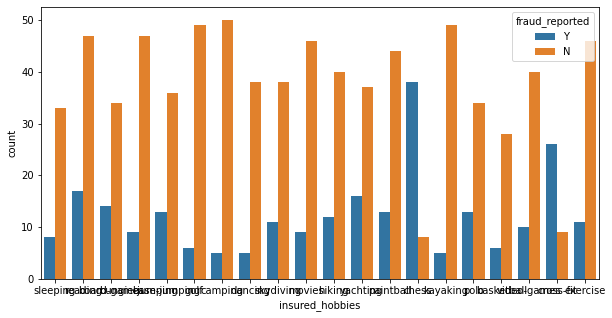

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


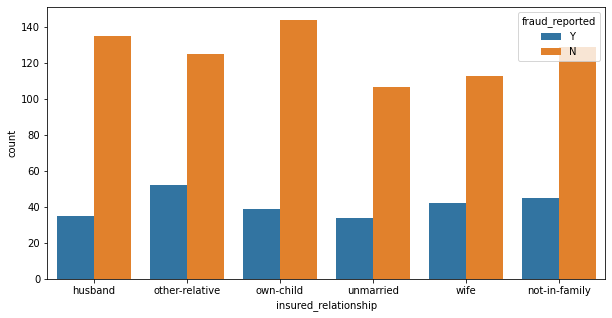

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


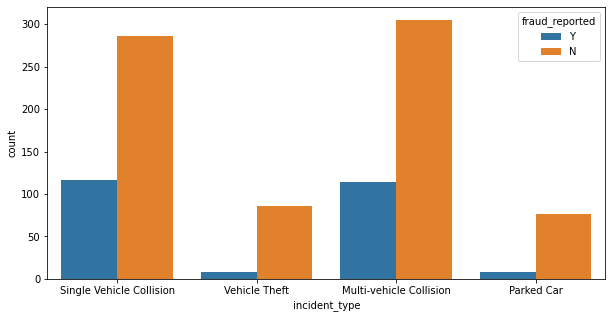

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


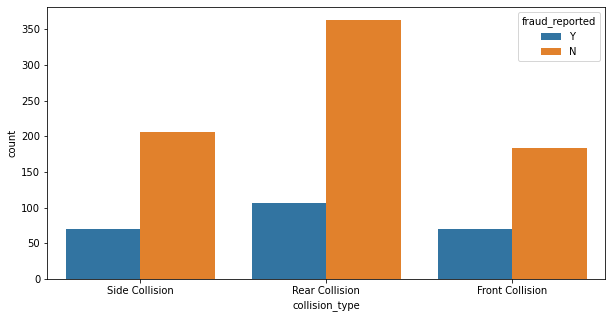

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


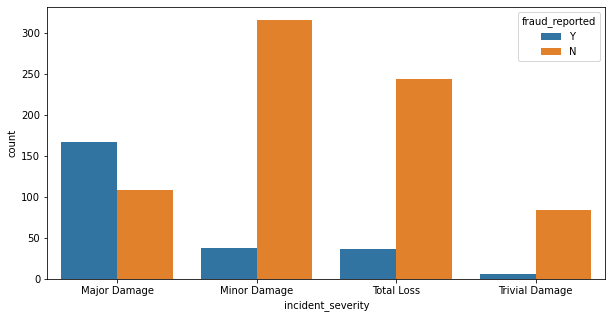

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


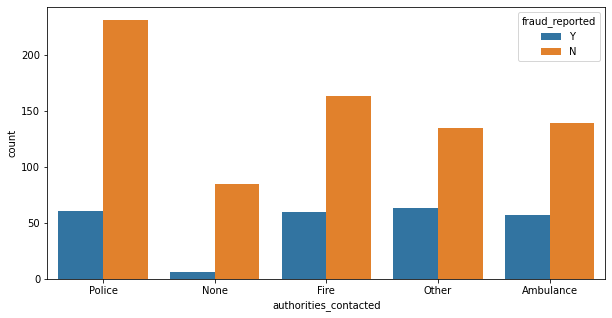

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


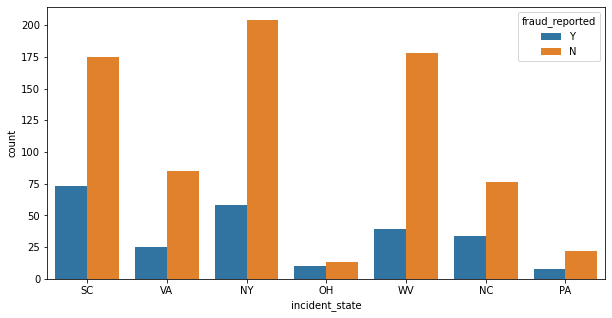

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


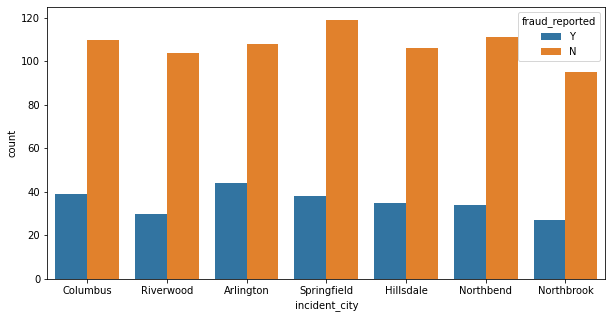

NO     698
YES    302
Name: property_damage, dtype: int64


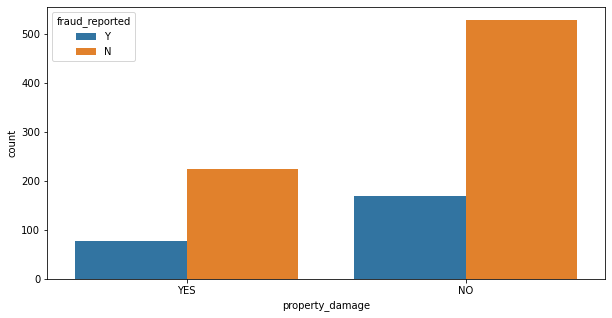

NO     686
YES    314
Name: police_report_available, dtype: int64


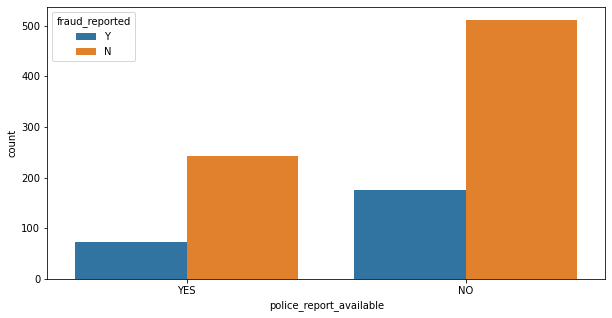

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


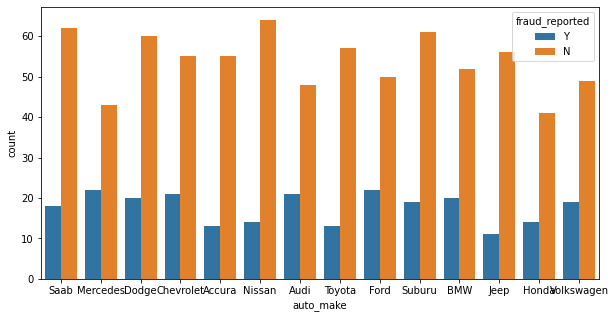

N    753
Y    247
Name: fraud_reported, dtype: int64


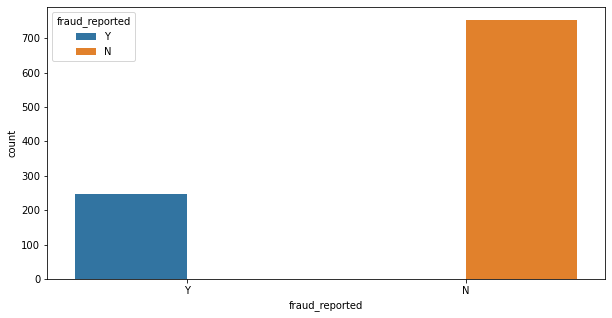

In [16]:
cat=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='fraud_reported', data=df)
    print(df[i].value_counts())
    plt.show()

In [17]:
# Let us now encode just the output column to do further visualisation.
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['fraud_reported']=enc.fit_transform(df['fraud_reported'].values.reshape(-1,1))
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,0.0


<Figure size 720x360 with 0 Axes>

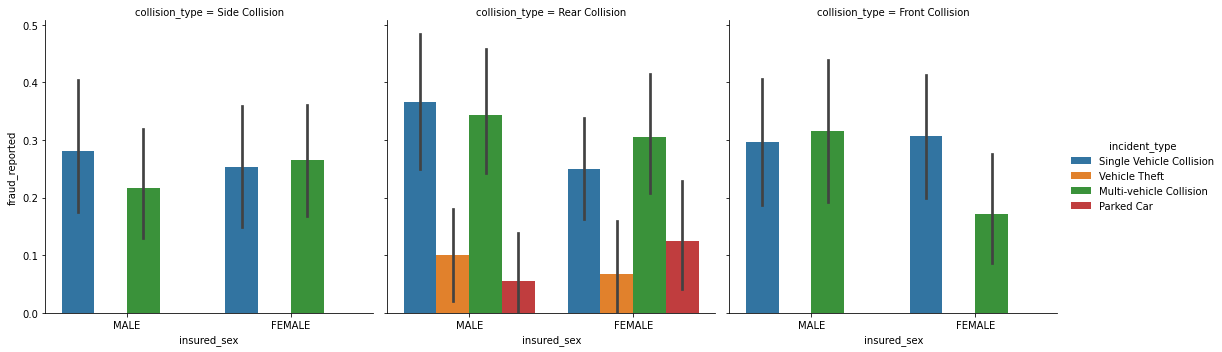

In [18]:
plt.figure(figsize=(10,5))
sns.catplot(x='insured_sex',y='fraud_reported',kind='bar',data=df,col='collision_type',hue='incident_type')

For side collision, we have more males reporting for fraud however moving to others females are more tentative to take fraud claim for rear and Front collision.

<AxesSubplot:xlabel='months_as_customer', ylabel='insured_sex'>

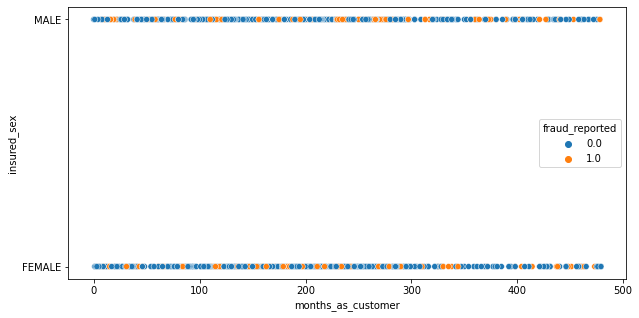

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='months_as_customer', y='insured_sex',data=df, hue='fraud_reported')

<AxesSubplot:xlabel='insured_education_level', ylabel='insured_relationship'>

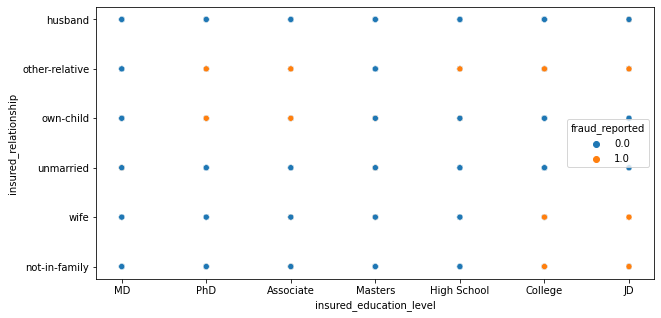

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='insured_education_level', y='insured_relationship',data=df, hue='fraud_reported')

Basically we can take an intution that people making more claim are dependant to other relative.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


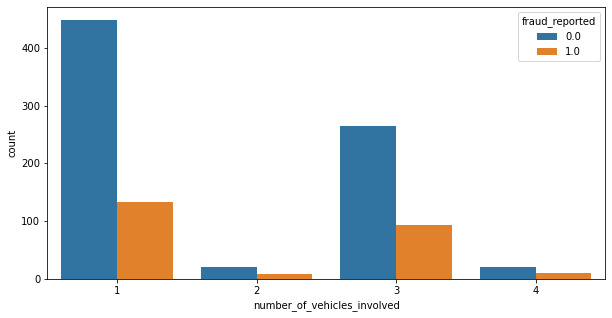

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)
print(df['number_of_vehicles_involved'].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


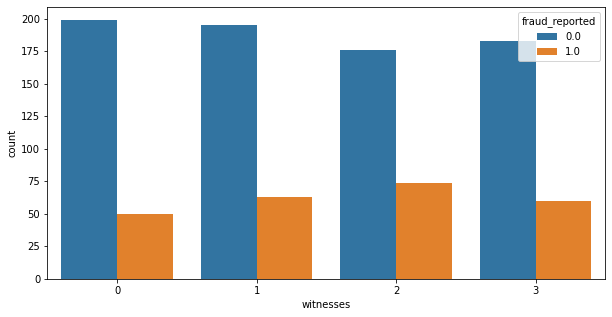

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='witnesses', hue='fraud_reported', data=df)
print(df['witnesses'].value_counts())

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


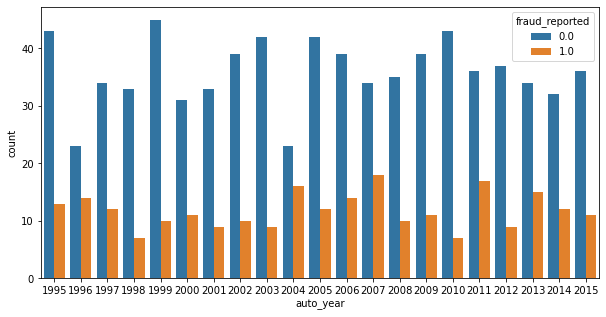

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
print(df['auto_year'].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


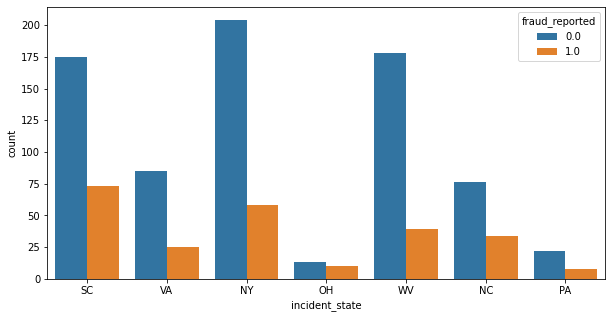

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_state', hue='fraud_reported', data=df)
print(df['incident_state'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


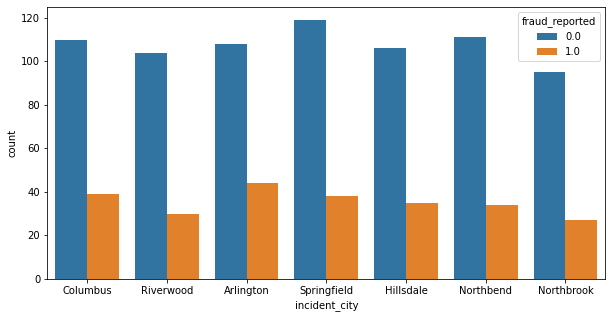

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_city', hue='fraud_reported', data=df)
print(df['incident_city'].value_counts())

In all the cities there are almost same number of fraud claims.

<AxesSubplot:>

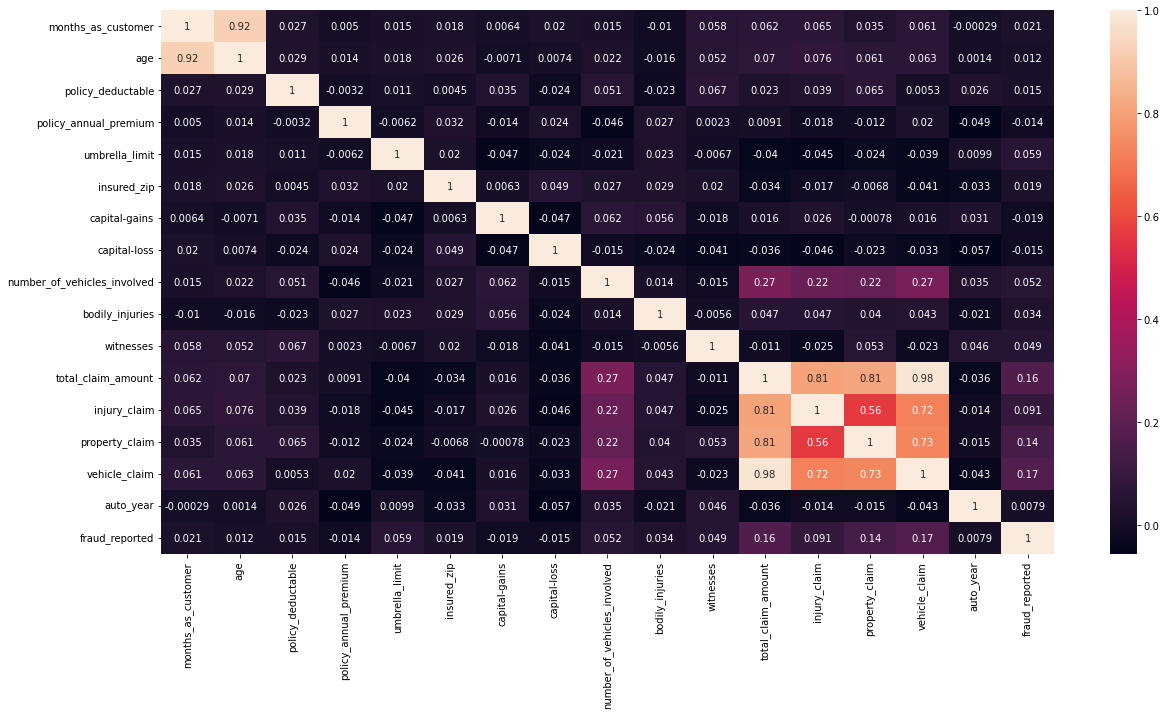

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We will remove the other 3 columns and only keep total_claim_amount as it captures the information and removes collinearity.

In [27]:
t = df['total_claim_amount'].iloc[1]
a = df['vehicle_claim'].iloc[1]
b = df['property_claim'].iloc[1]
c = df['injury_claim'].iloc[1]
print(t)
print(a+b+c)

5070
5070


Hence we know that both the columns are the same, we will remove these three columns.

In [28]:
df=df.drop(columns=['vehicle_claim','property_claim','injury_claim', ])
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Columbus,1,YES,1,2,YES,71610,Saab,2004,1.0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Riverwood,1,NO,0,0,NO,5070,Mercedes,2007,1.0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Columbus,3,NO,2,3,NO,34650,Dodge,2007,0.0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Arlington,1,NO,1,2,NO,63400,Chevrolet,2014,1.0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Arlington,1,NO,0,1,NO,6500,Accura,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Northbrook,1,YES,0,1,NO,87200,Honda,2006,0.0
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Northbend,1,YES,2,3,NO,108480,Volkswagen,2015,0.0
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Arlington,3,NO,2,3,YES,67500,Suburu,1996,0.0
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Arlington,1,NO,0,1,YES,46980,Audi,1998,0.0


In [29]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000,1.000000


Though we are able to see few outliers in months as customer, age, policy premium, etc.,

Will see through all the data and try to process them.

In [30]:
#As we have already read the encoder above, we will encode the rest here.

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

Checking for Zscore

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 14,  6,
        6,  6], dtype=int64))


In [32]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(1000, 30)
(981, 30)


In [33]:
# percentage of data loss.
data_loss = ((1000-981)/1000)*100
data_loss

1.9

In [34]:
# Let's Split our data into features & label
x=dfn.drop(columns='fraud_reported')
y=dfn['fraud_reported']

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Model Building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=.30,random_state=49)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
lr = LogisticRegression()
gnb=GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [40]:
model=[lr,knc,dtc,svc,rf,ada,gnb]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
    print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
    print('Calssification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
    print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.826530612244898
Accuracy score for the model is:  0.7152542372881356
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       214
         1.0       0.47      0.26      0.33        81

    accuracy                           0.72       295
   macro avg       0.61      0.57      0.58       295
weighted avg       0.68      0.72      0.69       295

Confusion Matrix is:  [[190  24]
 [ 60  21]]



The model is:  KNeighborsClassifier()
Accuracy score for the training :  0.8075801749271136
Accuracy score for the model is:  0.7084745762711865
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.73      0.94      0.82       214
         1.0       0.38      0.10      0.16        81

    accuracy                           0.71       295
   macro avg       0.56      0.52      0.49       295
weighted avg

Above results shows that DecisionTreeClassifier is giving the best test accuracy i.e, 80.67%

In [41]:
# Cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knc, dtc, svc, rf, ada, gnb]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = accuracy_score(y_train, pred_train)
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.7573880876179392



At cross fold 3 the cv score is 0.7512742099898063



At cross fold 4 the cv score is 0.7533101045296167



At cross fold 5 the cv score is 0.755350668186056



At cross fold 6 the cv score is 0.754326899097212



At cross fold 7 the cv score is 0.7543349254595455



At cross fold 8 the cv score is 0.7533070105291217



At cross fold 9 the cv score is 0.7543323139653415



The model is: 
 KNeighborsClassifier()
At cross fold 2 the cv score is 0.6962197098798786



At cross fold 3 the cv score is 0.6992864424057085



At cross fold 4 the cv score is 0.7033432885349262



At cross fold 5 the cv score is 0.7114990158499948



At cross fold 6 the cv score is 0.7165943438575489



At cross fold 7 the cv score is 0.7115139672890434



At cross fold 8 the cv score is 0.7094662135145942



At cross fold 9 the cv score is 0.7115188583078491



The model is: 
 DecisionTreeClassifier()
At cross fold 2 the c

In [42]:
# Let's plot AUC ROC curve

from sklearn.metrics import roc_curve,roc_auc_score

In [43]:
y_predprob=dtc.predict_proba(x_test)[:,1]

In [44]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)

In [45]:
fpr

array([0.        , 0.10747664, 1.        ])

In [46]:
tpr

array([0.        , 0.62962963, 1.        ])

In [47]:
thresholds

array([2., 1., 0.])

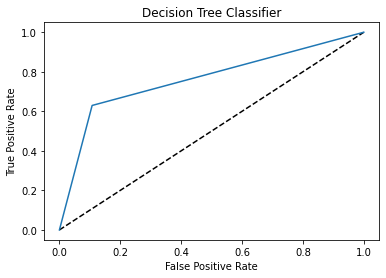

In [48]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Adaboost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [49]:
Auc_score=roc_auc_score(y_test,lr.predict(x_test))
Auc_score

0.5735548632744895

# Let's do some Hyperparameter tuning Using Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['log2','auto','sqrt']}

In [52]:
modeldtr = DecisionTreeClassifier()

In [53]:
grids = GridSearchCV(modeldtr,param,cv=4)

In [54]:
grid_result = grids.fit(x_train, y_train)

In [55]:
print(grids.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [56]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.7537059703522371


In [57]:
dtr=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='best')

In [58]:
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)
preddtr = dtr.predict(x_test)
data = [preddtr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,294
Predicted,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Actual,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

Errors:


Accuracy score for the training :  0.8075801749271136
Accuracy score for the model is:  0.7186440677966102
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       214
         1.0       0.48      0.40      0.44        81

    accuracy                           0.72       295
   macro avg       0.64      0.62      0.62       295
weighted avg       0.70      0.72      0.71       295

Confusion Matrix is:  [[180  34]
 [ 49  32]]





In [60]:
#let's save our model

import joblib
joblib.dump(lr,'Insurancedtr.obj')

['Insurancedtr.obj']

Model Saved